# Cardiovascular Disease Risk Prediction with Random Forest

Project By **Yusuf Abdul**.. 

In this project, I’ll explore a cardiovascular disease data through seaborn visualizations and predict disease risk using an sklearn-based `random forest classifier` considering diverse factors.

A well-structured pipeline will be used in my approach, including data exploration with seaborn and Matplotlib and data preprocessing with the `Scikit-learn (sklearn)` library.

Ultimately, my project aims to create a reliable and efficient CVD risk prediction model using the random forest algorithm. Data exploration insights and Scikit-learn capabilities will contribute to accurate risk assessments, potentially assisting healthcare professionals in making informed patient care and disease prevention decisions.

### Importing Neccessary Modules..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

/Users/ayusuf/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


After importing all the necessary modules, the next step would be for me to load the dataset.

### Loading the Dataset..

In [2]:
df = pd.read_csv('CVD_cleaned.csv', encoding='ISO-8859-1')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### Creating a Pairplot..

After loading the dataset, I will create the pairing grid of different plots from the df DataFrame. The `PairGrid()` function is a seaborn method used to generate the pair grid of multiple plots. This method accepts the DataFrame that contains the data to be visualized.

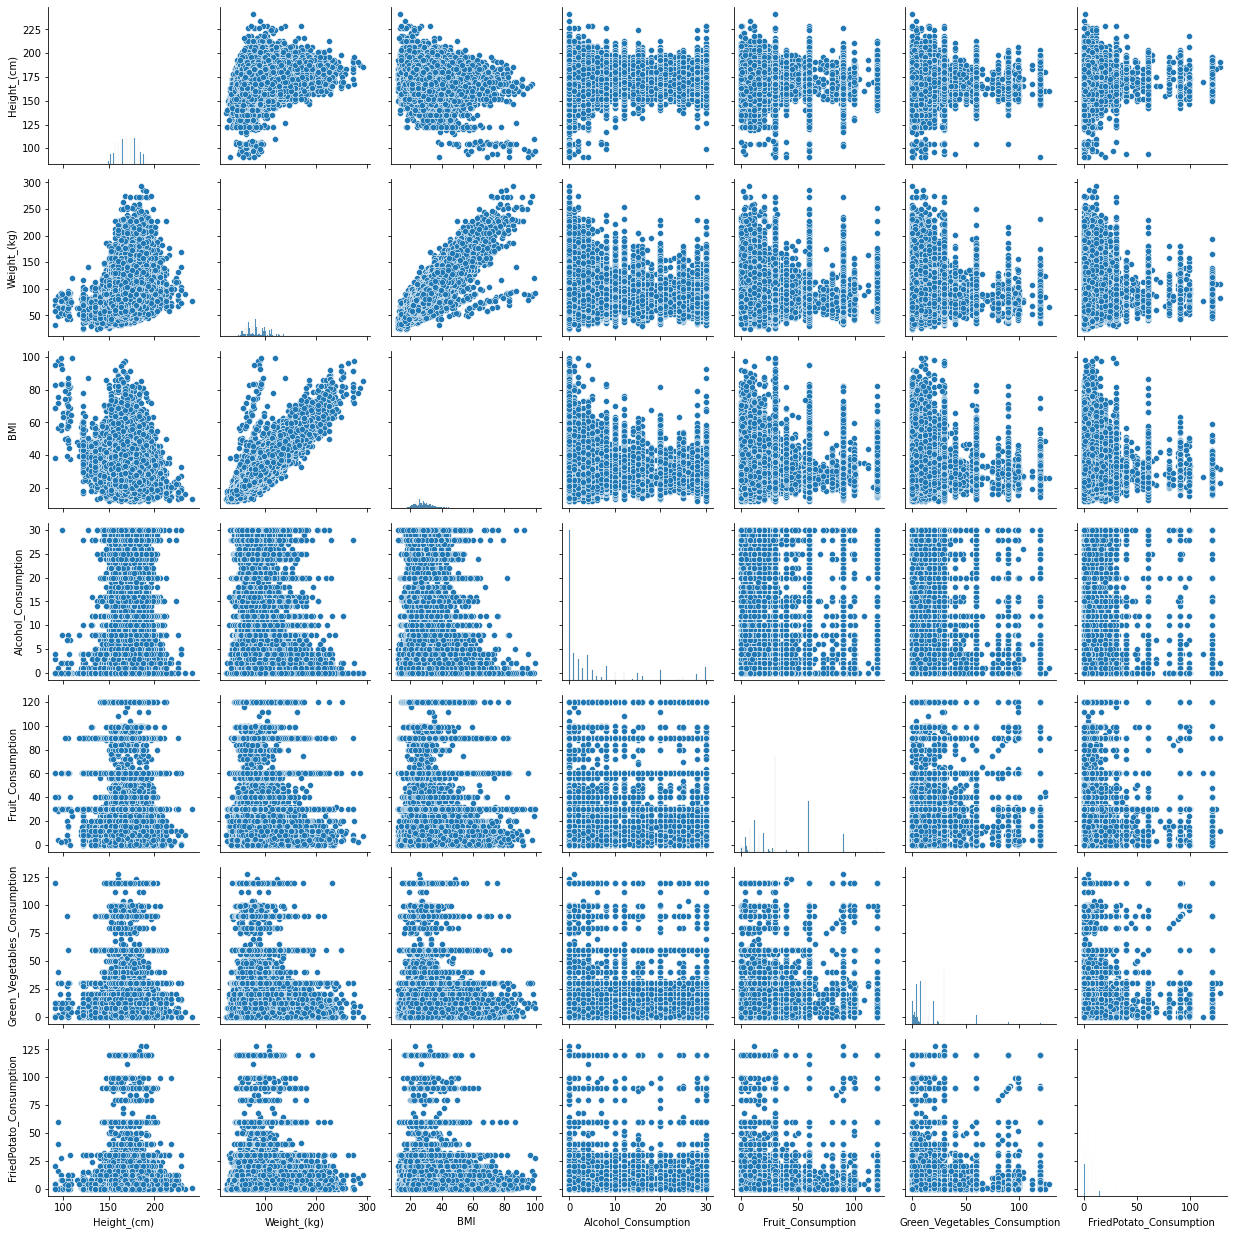

In [3]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Plotting the Distribution of Categorical Features..

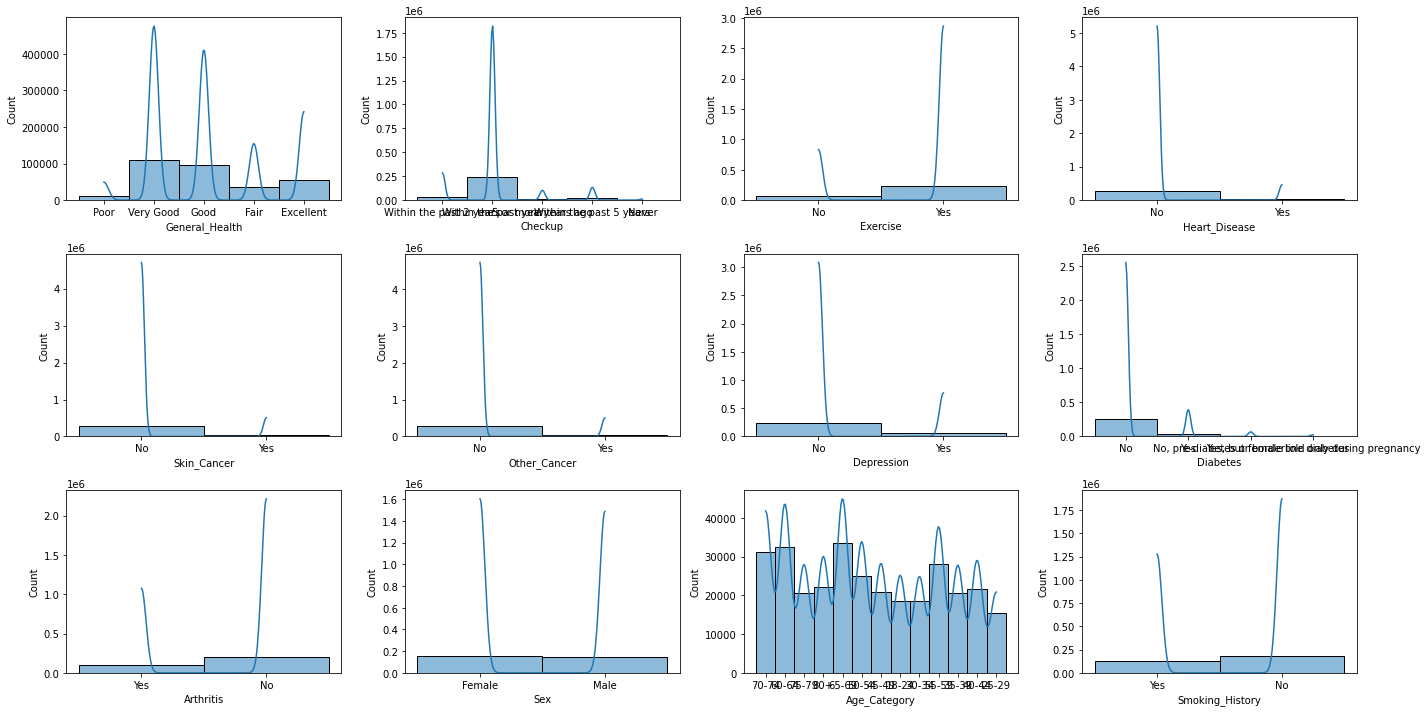

In [4]:
categorical_features = df.columns[df.dtypes =='object']
plot_num = 1
plt.figure(figsize=(20,10))
for col in categorical_features:
    ax = plt.subplot(3,4,plot_num)
    sns.histplot(df[col], kde=True)
    plot_num +=1

plt.tight_layout()
plt.show()

### Plotting the Distribution of Numerical Features

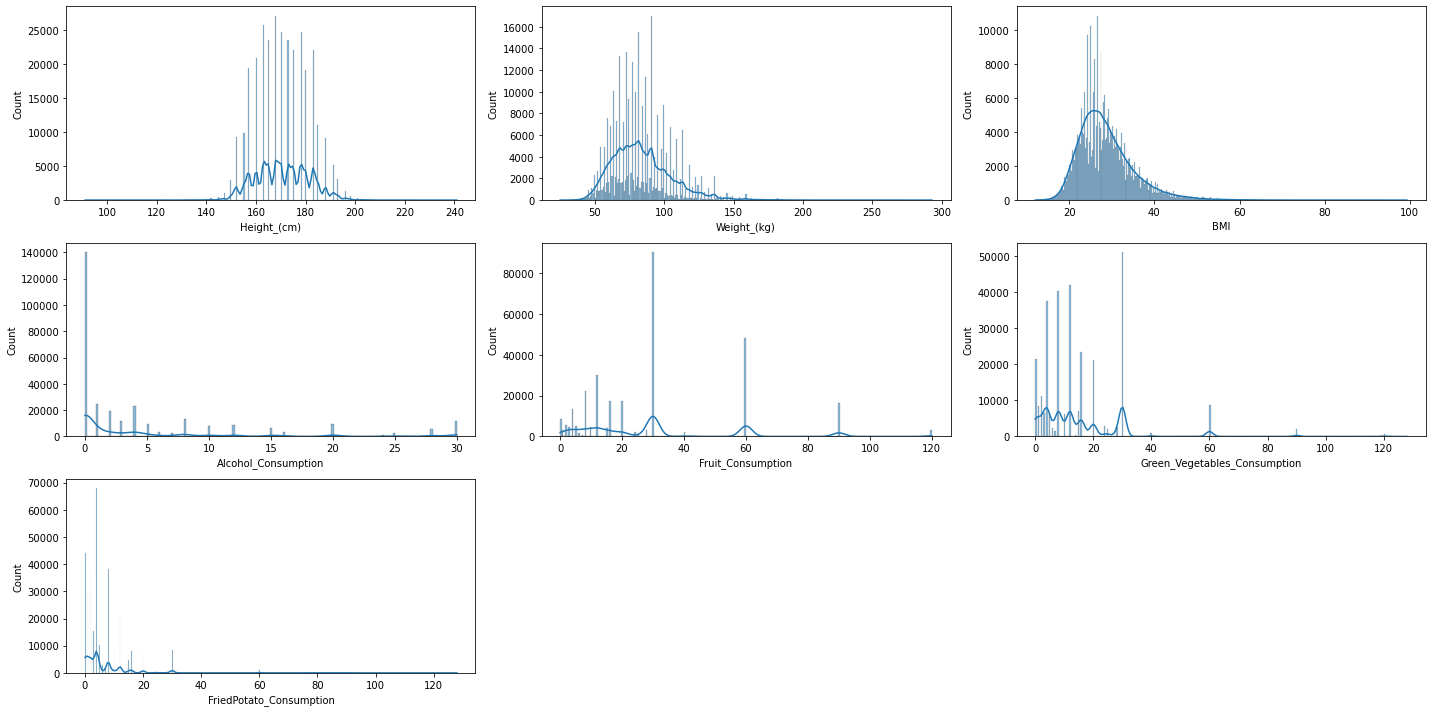

In [5]:
numerical_features = df.columns[df.dtypes !='object']
plot_num = 1
plt.figure(figsize=(20,10))
for col in numerical_features:
    ax = plt.subplot(3,3,plot_num)
    sns.histplot(df[col], kde=True)
    plot_num +=1

plt.tight_layout()
plt.show()

### Plotting the Relation of Some Selected Factors with Diseases..

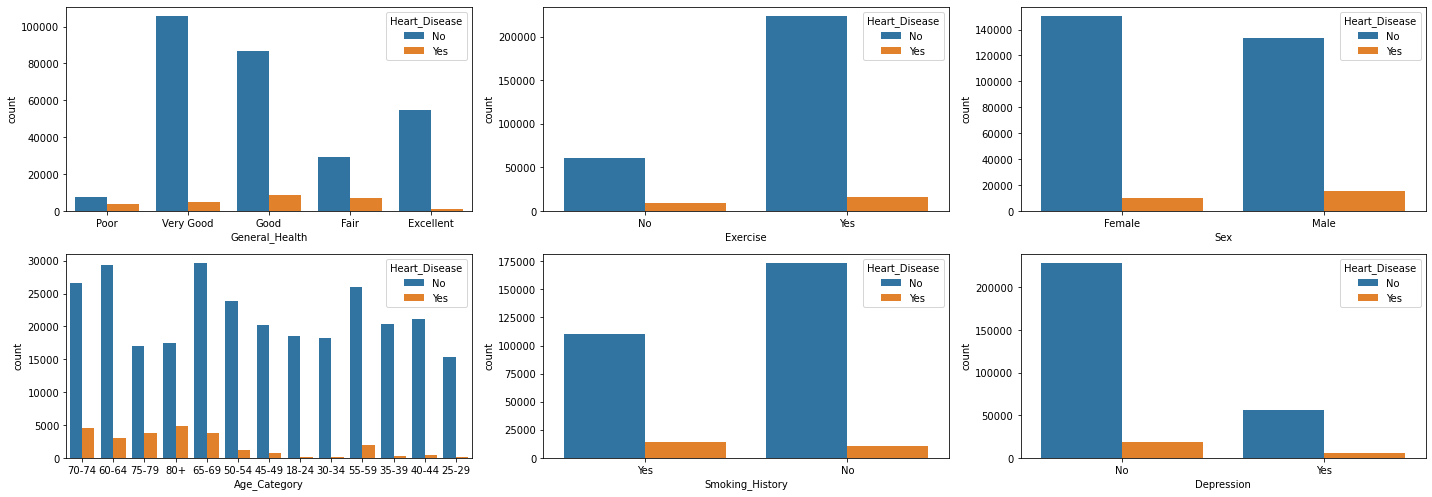

In [6]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History', 'Depression']
disease = 'Heart_Disease'
plot_num = 1
plt.figure(figsize=(20,10))
for variable in selected_variables:
    ax = plt.subplot(3,3, plot_num)
    sns.countplot(data=df, x = variable, hue = disease)
    plot_num += 1
plt.tight_layout()
plt.show()

### Data Transformation.. 

After plotting the distributions, I will go ahead and preprocess the data by transforming the categorical data into numerical data. To complete this task, I will perform the following steps:

1. Create a copy of the dataset so I don’t lose the actual data.
2. Get the indexes of the categorical dataset.
3. Use the fit_transform() method from the LabelEncoder() class to transform the data.
4. Print the first five rows of the dataset for confirmation of the aformentioned points.

In [7]:
data = df.copy()
categorical_features = df.columns[df.dtypes =='object']
le = LabelEncoder()
for i in categorical_features:
    data[i] = le.fit_transform(data[i])
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


### Splitting the Training and Testing Dataset..

After transforming the categorical data, the next step is to split the dataset into training and testing sets.

In [8]:
X = data.drop('Heart_Disease', axis='columns')
y = data['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### Building the Classifier..

After getting the training and testing dataset, I will build a model using the `RandomForestClassifier` from `sklearn`. To complete this task, use the `RandomForestClassifier()` class to build the model and pass the number of trees in each forest using `n_estimator` as an argument to this class.

In [9]:
classifier = RandomForestClassifier(n_estimators=500)

### Getting Predictions..

After building the complete model, it’s time to train the model. To do that, I will use the `fit()` function from the model instance and pass the following parameters to this method:

- X_train: Input parameters from the training dataset.
- y_train: Output parameters from the training dataset.

In [10]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

After training the model, it’s time to validate the model on the testing dataset to check the accuracy of the model. To complete this task, I will perform the following steps:

- Use the trained model to predict the testing data.
- Use the trained model to get the probability of predictions.

In [11]:
predictions = classifier.predict(X_test)
prediction_probability = classifier.predict_proba(X_test)

### Outputting the Confusion Matrix and Accuracy..

After getting the probabilities, I will get the classification report and accuracy of the model. To complete this task, perform the following steps:

- Get the classification report of the model using sklearn.
- Get the receiver operating characteristic (ROC) score of the model and print the score.

In [12]:
print("Report: \n", classification_report(y_test, predictions))
print('\n')
print("Roc Score: ", roc_auc_score(y_test, prediction_probability[:,1]))

Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     85134
           1       0.48      0.02      0.04      7523

    accuracy                           0.92     92657
   macro avg       0.70      0.51      0.50     92657
weighted avg       0.88      0.92      0.88     92657



Roc Score:  0.819886448974119


In [13]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Getting the true binary labels 
y_true = y_test

# Getting the predicted probabilities for the positive class (1)
y_score = prediction_probability[:, 1]

# Calculating ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

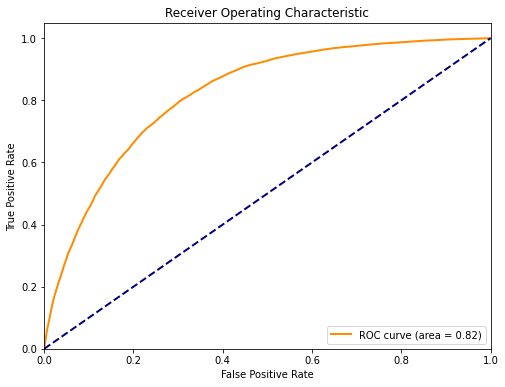

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

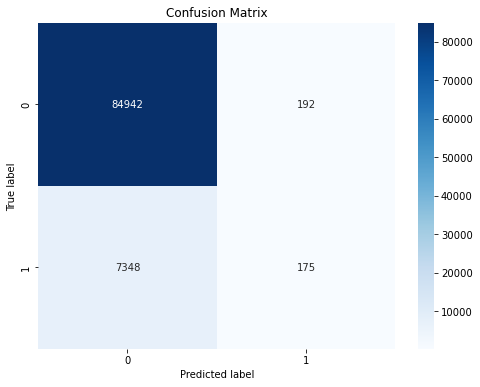

In [18]:
cm = confusion_matrix(y_true, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()